In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')


In [3]:
df.head(3)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df.isnull().sum()
# df.shape (13320,9)
#it have 9 columns and 13320 rows 


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
#we have to predict the price of the house by taking the input
#lets do some task on this dataset 
df.groupby('area_type')['area_type'].agg('count')  #this will return number of the counts in the 
#different categories present in the area_type columns

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
#now we remove the unwanted columns 
#or those columns that are not required in the prediction of the price

df=df.drop(['area_type','society','balcony','availability'],axis=1)


In [7]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df.isnull().sum()
df.dropna(inplace=True)

In [9]:
# df.isnull().sum()
df['size'].unique()  #this will give the all the categorical values are present in the particular column of the dataset
df['total_sqft'].isnull().sum()

0

In [10]:
#in this we only required the numerical calues so we can remove the bhk or bedroom from the categories 
def Size(x):
    y=x.split()
    return int(y[0])
#or we can reduce it to
# return x.split()[0]
df['bhk']=df['size'].apply(Size)  #also we have to convert the data type into the integer type



In [11]:
# df['size'].value_counts()
#here 43 is a outlier so we can remove them because they are affecting our output 
#first we do without removing the outliers 
df['total_sqft'].unique() #here sometimes values like 1233-3434 so we have to convert it into a single number 
def Total(x):
    y=x.split(' - ')
    if len(y)>1:
        return int((float(y[0])+float(y[1]))/2)
    try:
        return int(float(y[0])) #indexed is used because it is a list 
    except:
        return None 
    #because their some cases where values like 3434sq,584ft so we have to igonore them

    
#lets check the working of our function
#it is working fine 
print(Total('3300.5'))
print(Total('1003 - 1003'))

df['total_sqft']=df['total_sqft'].apply(Total)

3300
1003


In [12]:
df['total_sqft'].isnull().sum()
#let we can drop these values 
df.dropna(inplace=True)

In [13]:
df.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [14]:
df.shape
#we only lost the 120 rows in the process of the data cleaning
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [15]:
#lets apply the feature engineering on the data frame
# as we know can merge total_sqft and price as price per sqft 
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [16]:
# lets check the categories of the location 
df['location'].unique()  #so their are 1298 categories of the location of the banglore
df['location']=df['location'].apply(lambda x:x.strip())  #it removes the extra spaces from the location of the dataset 
df['location'].unique().shape
location_stats=df.groupby('location')['location'].agg('count').sort_values(ascending=True)
len(location_stats[location_stats<=10]) #and 
#we put all this location into the other category 
less_then_ten=location_stats[location_stats<=10]

In [17]:
#lets apply the transformation 
df['location']=df['location'].apply(lambda x:'other' if x in less_then_ten else x )

In [18]:
len(df['location'].unique())

241

In [19]:
#lets do the outlier removal from the dataset
# #first let detects the outlier 
df.head() 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
df[(df.total_sqft/df['bhk'])<300].head() #total 744 rows with this condition

#means we required 300 sqft for a single room 
# if their are some with less values are outliers 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [21]:
df.shape #so we can remove the 770 rows from it 


(13200, 7)

In [22]:
df1=df[~(df['total_sqft']/df['bhk']<300)]

In [23]:
df1.shape

(12456, 7)

In [24]:
#lets check the price per sqft 
df1.price_per_sqft.describe() #here the min value is very low and the maximum value is very high 

count     12456.000000
mean       6308.528083
std        4168.130876
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [25]:
# as we know in the normalized data the 68 part of the data comes under the mean and 1 std deviation
def remove_pps_outliers(d):
    df_out=pd.DataFrame()
    for key,subdf in d.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
        

    return df_out

In [26]:
df2=remove_pps_outliers(df1)
#by this we removed 1200 records from our dataset 


df2.shape

(10242, 7)

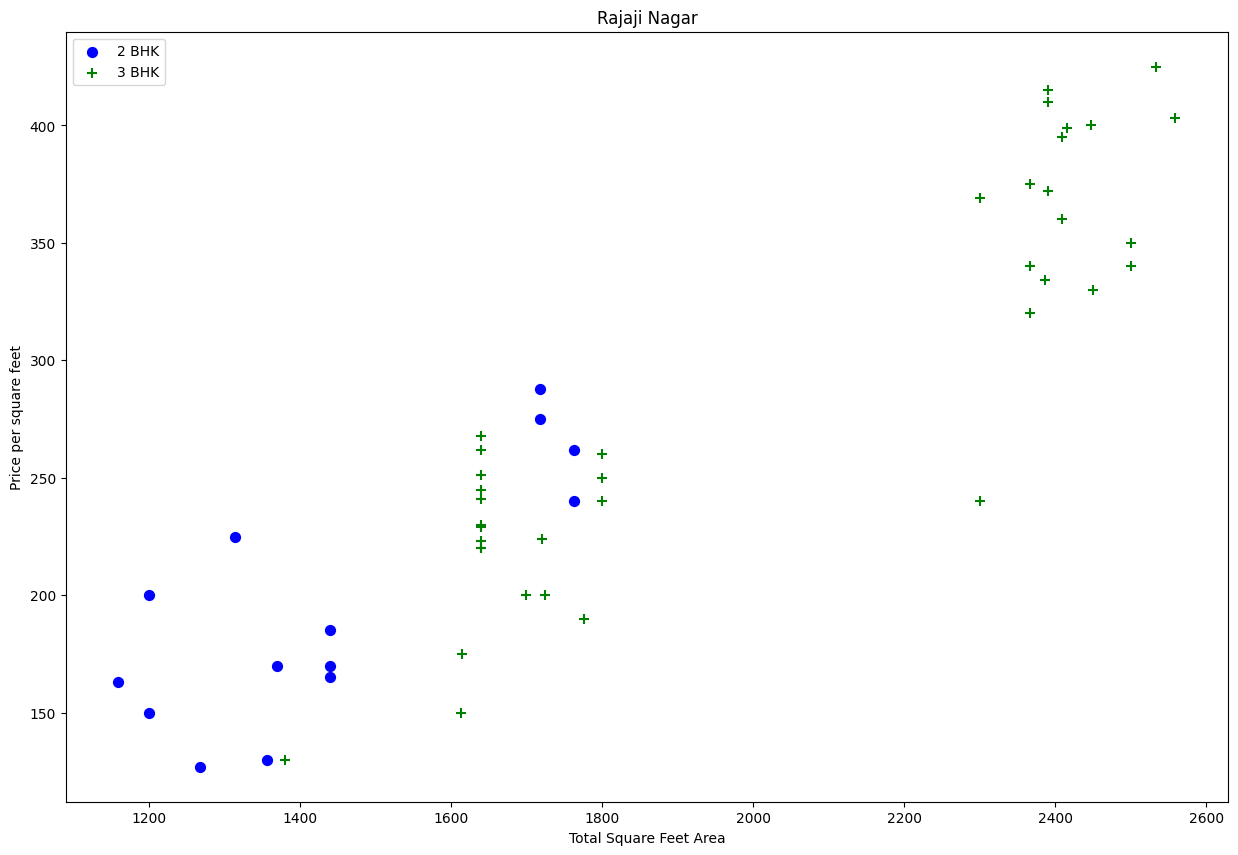

In [27]:
#their are some cases when the bhk is small  but the prices are very high so we have to remove them 
import matplotlib
def plot_scatter(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per square feet')
    plt.title(location)
    plt.legend() 
plot_scatter(df2,'Rajaji Nagar')
#in every location their are some points where the values of 2 bhk is more then the values of the 3bhk 
#we have to simply remove them for improving the performance of the model 
#and by this our model do work efficiently 


We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [28]:
# We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

# {
#     '1' : {
#         'mean': 4000,
#         'std: 2000,
#         'count': 34
#     },
#     '2' : {
#         'mean': 4300,
#         'std: 2300,
#         'count': 22
#     },    
# }
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [29]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df3 = remove_bhk_outliers(df2)
# df8 = df7.copy()
df3.shape

(7317, 7)

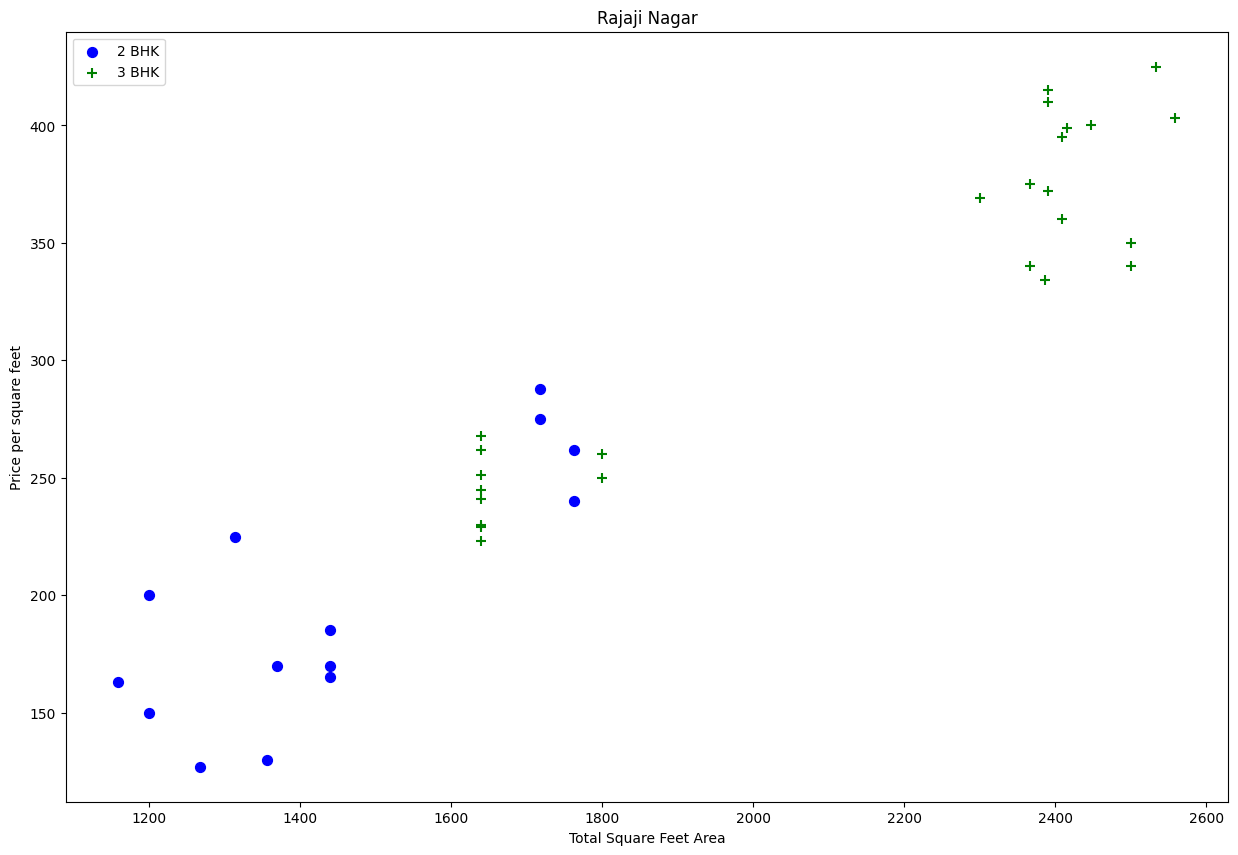

In [30]:
plot_scatter(df3,"Rajaji Nagar")
#here in the below scatter plot we can see that outliers are removed 


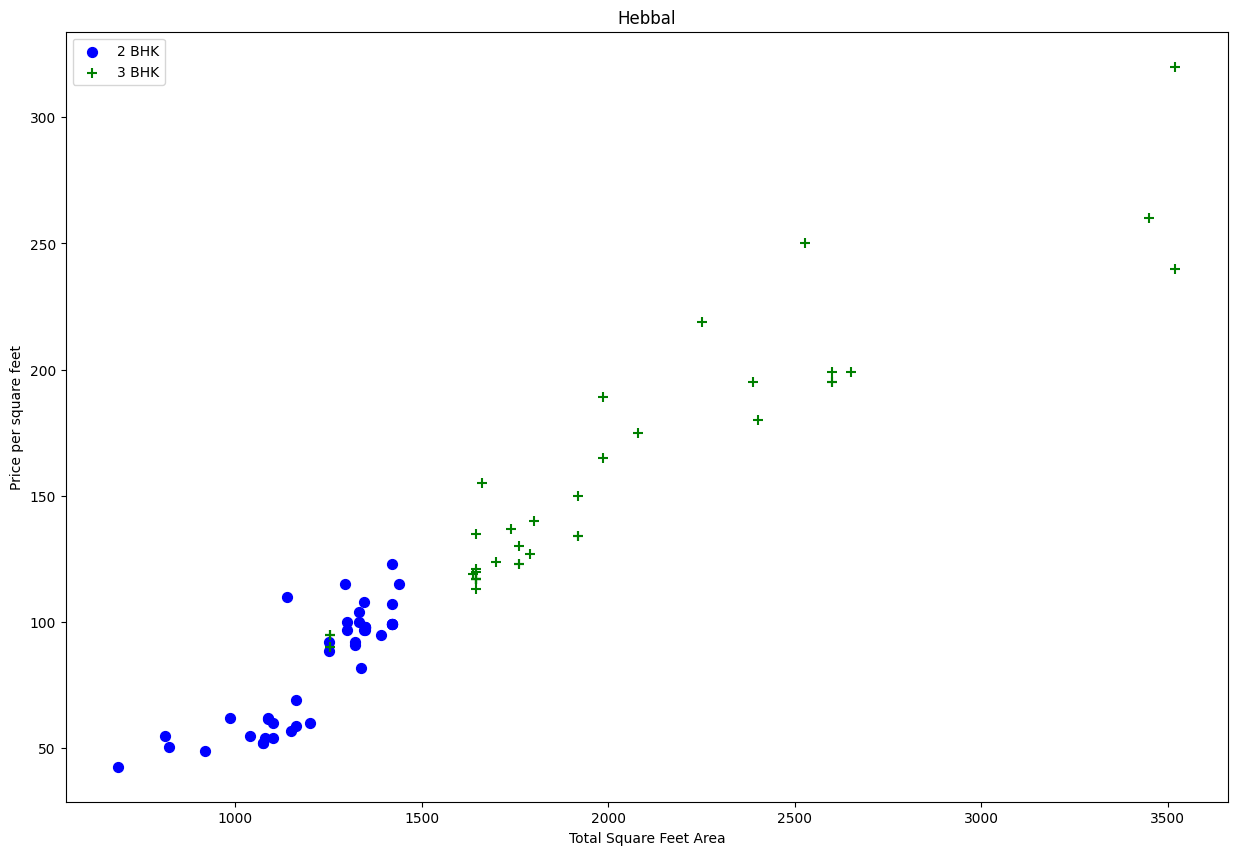

In [31]:
plot_scatter(df3,'Hebbal')

Text(0, 0.5, 'Count')

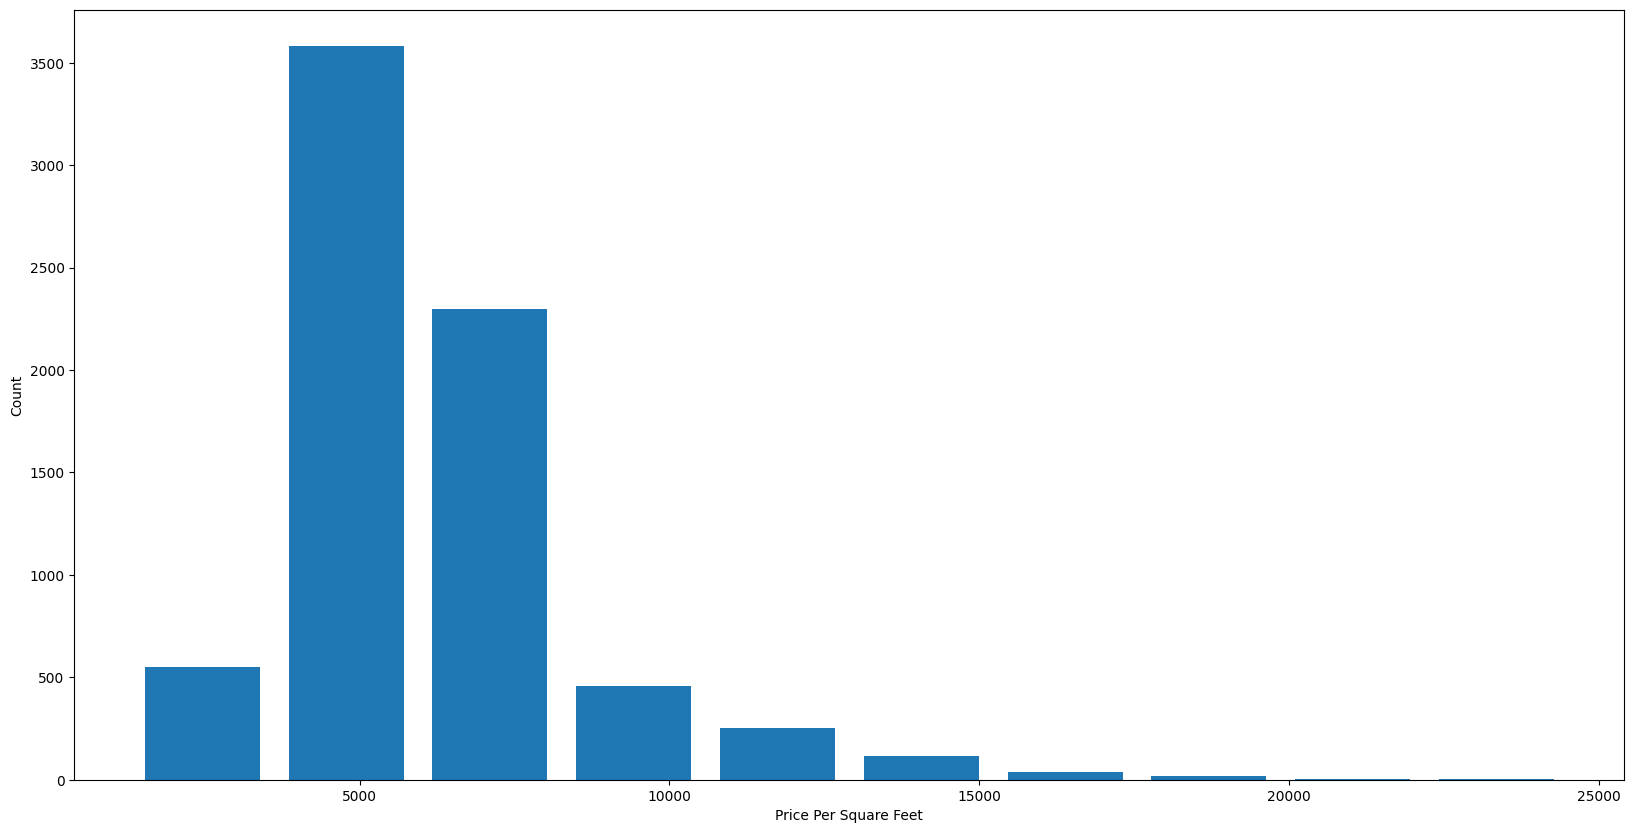

In [32]:
df3.shape
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [33]:
df3.bath.unique()  #the number of the bathrooms in the home 


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [34]:
df3[df3.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


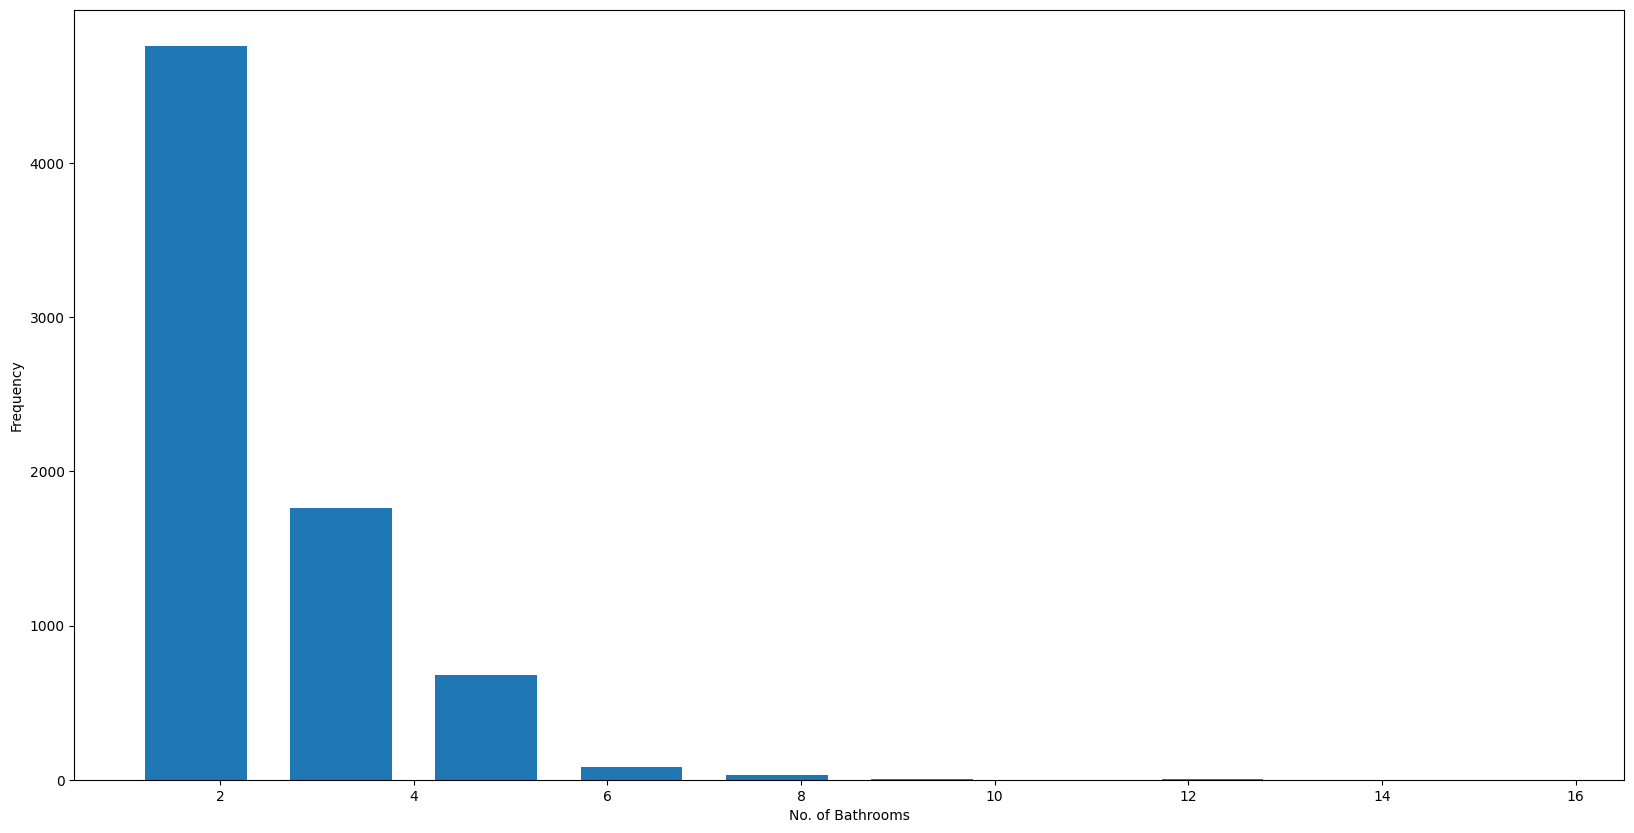

In [35]:
plt.hist(df3.bath,rwidth=0.7)
plt.xlabel('No. of Bathrooms')
plt.ylabel('Frequency')
plt.show()

In [36]:
#there are outlier when bath is more then 8 
#lets analyse the data 
df3[df3.bath>df3.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [37]:
df4=df3[df3.bath<df3.bhk+2]
df4.shape

(7239, 7)

In [38]:
df4.head() #here no use of price per sqft because it is used to detect the outliers in the data 
#and we can also drop size 
df4.drop(columns=['size','price_per_sqft'],axis=1,inplace=True)

C:\Users\aashi\AppData\Local\Temp\ipykernel_15752\3279397498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns=['size','price_per_sqft'],axis=1,inplace=True)


In [39]:
df4.shape #data shape is (7239,5)

df4.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [40]:
#here we have to convert the location in to the numerical columns
#we use the one hot encoding 
dummies=pd.get_dummies(df4['location'],dtype=int) #by default it generates the output in the bool values 
#so we use the int 

dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df5=pd.concat([df4,dummies.drop('other',axis='columns')],axis=1)  #this append the dummies columns 
#as we know we can remove any one columns from the dummies

len(df5.columns)

245

In [61]:

df5.columns

Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [63]:
# df5.drop('location',axis=1,inplace=True)
len(df5.columns)
print(df['bath'].max(),df['bath'].min())
print(df['bhk'].max(),df['bhk'].min())
print(df['total_sqft'].max(),df['total_sqft'].min())

40.0 1.0
43 1
52272.0 1.0


In [43]:
df5.shape
x=df5.drop('price',axis='columns')
y=df5['price']
len(x.columns)


243

In [44]:
#we have separated the input and output columns from the dataset 

In [45]:
#lets divide the data
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [46]:

from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(xtrain,ytrain)


LinearRegression()

In [47]:
ypred=lr.predict(xtest)

In [48]:

from sklearn.metrics import accuracy_score 
lr.score(xtest,ytest)
print(xtest.shape)

(1448, 243)


In [49]:
#lets do some cross validation to check our accuracy
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import ShuffleSplit 
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)  #majority is the similar score then 
#this is our best accuracy then we get on this data set 


array([0.82702345, 0.86026701, 0.85322234, 0.84364676, 0.85481528])

In [50]:
# #lets try to apply the another algorithm for finding the best accuracy 
# #lets apply the grid search cv
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# def find_best_model_using_gridsearchcv(X,y):
#     algos = {
#         'linear_regression' : {
#             'model': LinearRegression(),
#             'params': {
#                 'fit_intercept': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1,2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion' : ['mse','friedman_mse'],
#                 'splitter': ['best','random']
#             }
#         }
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(x,y)
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Fixed deprecated values
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Ensure x and y are defined before calling this function
# Example:
# x, y = load_your_data()  # Replace with actual data loading
# results = find_best_model_using_gridsearchcv(x, y)
# print(results)


In [51]:
print(find_best_model_using_gridsearchcv(x,y))

               model  best_score  \
0  linear_regression    0.847950   
1              lasso    0.726738   
2      decision_tree    0.722029   

                                         best_params  
0                           {'fit_intercept': False}  
1                {'alpha': 2, 'selection': 'cyclic'}  
2  {'criterion': 'squared_error', 'splitter': 'ra...  


In [52]:
np.where(x.columns=='Vijayanagar')[0][0] 

233

In [53]:
np.where(x.columns=='other') #when their is any thing come which is not in the columns 
#then it will return null or None 
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [54]:
 #so here we can see that the linear regression giving the best result on the dataset 
#let do some prediction on the test data using the linear regression model 
#here is the multiple columns but you directly can't give the values so we have to give the values by the following way
#because here it is one hot encoding for the location 
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    inp = np.zeros(len(x.columns))
    
    inp[0] = sqft
    inp[1] = bath
    inp[2] = bhk
    if loc_index >= 0:
        inp[loc_index] = 1
    print(inp)
    print(inp.shape)
    return lr.predict([inp])[0]
print(predict_price('1st Block Jayanagar',2850,4,4))
# 2850.0	4.0	428.0	4	

[2.85e+03 4.00e+00 4.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e

c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
# 2850.0	4.0	428.0	4	
print(predict_price('1st Block Jayanagar',2850,4,4))
print(predict_price('1st Phase JP Nagar',1000,3,3))
# 1630.0	3.0	194.0	3
print(predict_price('1st Block Jayanagar',1630,3,3))


[2.85e+03 4.00e+00 4.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e

c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\aashi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
#let export the model into the pickle file 
import pickle 
pickle.dump(lr,open('bengaluru_house_price_prediction.pkl','wb')) #we have successfully dumped our model into the system


In [57]:
#let store the columns name for we required the index of them for the input 
import json
columns={'data_columns':[col.lower() for col in x.columns]
         }
json.dump(columns,open('column_names.json','w'))
#here we also stored the names of the columns present in the dataset 